In [1]:
import xbbg
from xbbg import blp
import numpy as np
import pandas as pd
import datetime as DT
import matplotlib.pyplot as plt
import sklearn as sklearn
from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
pd.options.display.float_format = '{:,.2f}'.format

c:\users\boris\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
c:\users\boris\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1

In [2]:
today = DT.date.today()
startdate = '1/1/2003'
enddate = today
writer = pd.ExcelWriter('mpca.xlsx')

In [3]:
def get_dict_inv(d):
    return {v: k for k, v in d.items()}

def standardize_data(df):
    return (df-df.mean())/df.std()

In [4]:
all_t={
"f1" : "CTOTBRL Index",
"f2" : "CTOTCNY Index",
"f3" : "CTOTCLP Index",
"f4" : "CTOTCOP Index",
"f5" : "CTOTCZK Index",
"f6" : "CTOTEGP Index",
"f7" : "CTOTHUF Index",
"f8" : "CTOTILS Index",
"f9" : "CTOTINR Index",
"f10" : "CTOTIDR Index",
"f11" : "CTOTMXN Index",
"f12" : "CTOTMYR Index",
"f13" : "CTOTNGN Index",
"f14" : "CTOTPLN Index",
"f15" : "CTOTRON Index",
"f16" : "CTOTRUB Index",
"f17" : "CTOTZAR Index",
"f18" : "CTOTKRW Index",
"f19" : "CTOTTHB Index",
"f20" : "CTOTTRY Index",
"f21" : "CTOTUAH Index",
"f22" : "CTOTCAD Index",
"f23" : "CTOTAUD Index",
"f24" : "CTOTGBP Index",
"f25" : "CTOTUSD Index",
"f26" : "CTOTEUR Index",
"f27" : "CTOTCHF Index",
"f28" : "CTOTJPY Index",
"f29" : "CTOTSEK Index",
"f30" : "CTOTNOK Index",
"f31" : "CTOTNZD Index",
"f32" : "CTOTSGD Index",

}



all_t_inv= {v: k for k, v in all_t.items()}

In [5]:
df= blp.bdh(all_t.values(),'PX_LAST', startdate, enddate, periodicitySelection = "DAILY")
df.columns = df.columns.get_level_values(0)
df.rename(columns=lambda x:all_t_inv[x], inplace=True)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df.tail()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32
2022-05-27,12.67,-37.33,28.66,84.72,-13.38,49.67,-10.67,-27.70,-54.47,16.96,...,64.24,6.27,-3.79,-14.82,-11.68,-48.31,-8.92,124.92,12.34,-13.52
2022-05-30,12.60,-37.56,28.13,87.38,-13.50,49.66,-10.81,-27.96,-55.45,18.70,...,67.02,6.17,-3.66,-15.04,-11.71,-48.91,-9.13,125.69,12.44,-13.52
2022-05-31,11.94,-38.10,28.25,89.64,-13.79,50.12,-11.24,-28.12,-56.95,20.75,...,70.23,5.95,-4.05,-15.40,-11.75,-50.34,-9.28,127.73,11.98,-13.68
2022-06-01,11.38,-37.31,28.34,86.44,-13.39,51.45,-10.64,-27.60,-54.42,17.20,...,66.04,6.37,-3.65,-14.40,-11.57,-48.76,-8.88,122.97,11.34,-13.62
2022-06-02,12.20,-37.48,28.03,86.80,-13.51,51.82,-10.75,-27.64,-53.87,16.99,...,66.29,6.42,-3.53,-14.54,-11.76,-48.81,-8.92,123.61,11.17,-13.71


In [6]:
TIME = df.index
print(TIME)

Index([2003-01-01, 2003-01-02, 2003-01-03, 2003-01-06, 2003-01-07, 2003-01-08,
       2003-01-09, 2003-01-10, 2003-01-13, 2003-01-14,
       ...
       2022-05-20, 2022-05-23, 2022-05-24, 2022-05-25, 2022-05-26, 2022-05-27,
       2022-05-30, 2022-05-31, 2022-06-01, 2022-06-02],
      dtype='object', length=5067)


In [7]:
df_normalized=(df - df.mean()) / df.std()
pca = PCA(n_components=df.shape[1])
pca.fit(df_normalized)
PCS = pca.fit_transform(df_normalized)

In [8]:
loadings = pd.DataFrame(pca.components_.T,
columns=['PC%s' % _ for _ in range(len(df_normalized.columns))],
index=df.columns)
print(loadings)


      PC0   PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  ...  PC22  \
f1   0.15  0.05  0.32 -0.32 -0.36 -0.23  0.21  0.05  0.23 -0.06  ...  0.05   
f2  -0.22  0.01 -0.16  0.01  0.07  0.07  0.04 -0.02  0.00  0.09  ... -0.12   
f3   0.15 -0.21  0.19 -0.12  0.02  0.25 -0.56  0.06  0.24 -0.55  ...  0.01   
f4   0.22  0.03  0.01 -0.00  0.01 -0.28 -0.13 -0.09 -0.20  0.17  ...  0.12   
f5  -0.22 -0.07  0.08  0.00 -0.01 -0.17 -0.08  0.02 -0.02  0.23  ...  0.16   
f6   0.15 -0.27  0.02  0.14  0.21 -0.02  0.25  0.14  0.03  0.03  ...  0.02   
f7  -0.19 -0.21  0.05  0.04 -0.15 -0.05 -0.11 -0.09 -0.06  0.26  ... -0.31   
f8  -0.22  0.05  0.05  0.01  0.11  0.09 -0.03  0.19  0.01 -0.06  ...  0.04   
f9  -0.20  0.13 -0.10 -0.04 -0.11  0.26  0.12 -0.22  0.01 -0.07  ...  0.15   
f10  0.03  0.33  0.18 -0.16  0.38  0.13 -0.23  0.21 -0.19  0.18  ... -0.00   
f11  0.13 -0.27 -0.18 -0.11 -0.21  0.00 -0.14  0.35  0.24  0.30  ...  0.01   
f12 -0.03  0.36 -0.01 -0.00  0.15  0.29  0.11  0.42  0.22  0.11 

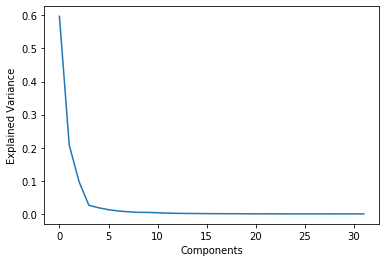

In [9]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()


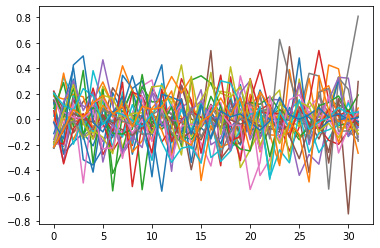

In [10]:
plt.plot(pca.components_)
plt.show()

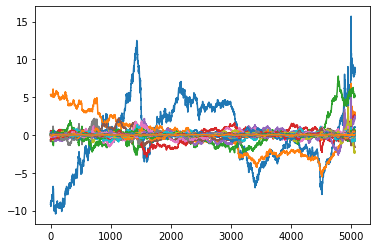

In [11]:
plt.plot(PCS)
plt.show()

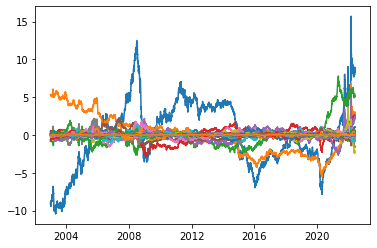

In [12]:
TOT = pd.DataFrame.from_records(data=PCS, columns = ["t1" ,	"t2" ,	"t3" ,	"t4" ,	"t5" ,	"t6" ,	"t7" ,	"t8" ,	"t9" ,	"t10" ,	"t11" ,	"t12" ,	"t13" ,	"t14" ,	"t15" ,	"t16" ,	"t17" ,	"t18" ,	"t19" ,	"t20" ,	"t21" ,	"t22" ,	"t23" ,	"t24" ,	"t25" ,	"t26" ,	"t27" ,	"t28" ,	"t29" ,	"t30" ,	"t31" ,	"t32" ,
], index=TIME)

plt.plot(TOT)
plt.show()

In [13]:
TOT.head()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32
2003-01-01,-9.19,5.34,-0.67,0.43,-0.73,-0.81,0.11,0.18,-0.10,0.17,...,0.04,0.01,-0.01,0.07,-0.04,0.01,0.01,0.01,-0.01,-0.00
2003-01-02,-9.18,5.32,-0.69,0.44,-0.71,-0.81,0.11,0.18,-0.09,0.17,...,0.05,0.01,-0.01,0.07,-0.04,0.01,0.02,0.01,-0.00,-0.00
2003-01-03,-8.88,5.29,-0.82,0.58,-0.66,-0.84,0.13,0.32,-0.14,0.17,...,0.04,0.02,0.02,0.06,-0.02,0.02,0.02,0.00,-0.00,-0.01
2003-01-06,-9.23,5.17,-0.66,0.44,-0.74,-0.87,0.04,0.11,-0.02,0.21,...,0.04,0.03,-0.02,0.03,-0.03,0.01,0.02,0.02,0.02,-0.01
2003-01-07,-9.36,5.32,-0.53,0.40,-0.74,-0.82,0.03,0.09,0.00,0.17,...,0.06,-0.00,-0.02,0.06,-0.04,-0.01,0.02,0.03,0.00,-0.00


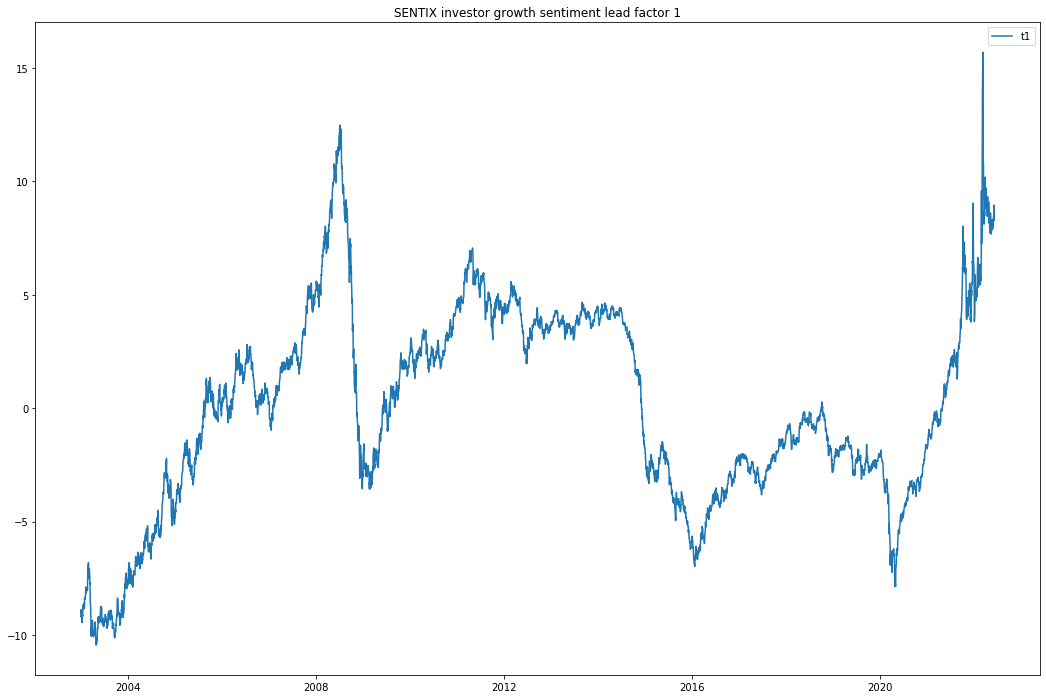

In [15]:
TOT1 = TOT.drop([ 	"t2" ,	"t3" ,	"t4" ,	"t5" ,	"t6" ,	"t7" ,	"t8" ,	"t9" ,	"t10" ,	"t11" ,	"t12" ,	"t13" ,	"t14" ,	"t15" ,	"t16" ,	"t17" ,	"t18" ,	"t19" ,	"t20" ,	"t21" ,	"t22" ,	"t23" ,	"t24" ,	"t25" ,	"t26" ,	"t27" ,	"t28" ,	"t29" ,	"t30" ,	"t31" ,	"t32" ], axis=1)
TOT1.plot(figsize=(18,12), title="Terms of trade lead factor 1")
plt.show()

In [16]:
TOT.tail()

,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,...,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32
2022-05-27,8.24,2.79,5.22,2.53,2.02,-1.48,0.42,-0.64,-2.19,-0.77,...,0.05,0.02,0.01,-0.05,-0.06,-0.01,0.06,0.11,-0.01,0.01
2022-05-30,8.51,2.90,5.28,2.48,2.19,-1.58,0.34,-0.70,-2.28,-0.65,...,0.04,0.03,0.04,-0.07,-0.05,0.03,0.04,0.13,0.01,0.01
2022-05-31,8.96,3.06,5.11,2.41,2.50,-1.62,0.21,-0.67,-2.17,-0.46,...,0.06,0.02,0.05,-0.08,-0.03,0.05,-0.02,0.13,0.01,0.01
2022-06-01,8.28,2.66,5.01,2.48,2.25,-1.60,0.34,-0.80,-2.33,-0.73,...,0.07,0.02,-0.05,-0.09,-0.01,-0.01,-0.02,0.14,-0.05,0.02
2022-06-02,8.39,2.68,5.02,2.41,2.20,-1.63,0.45,-0.83,-2.35,-0.79,...,0.07,0.05,-0.04,-0.08,-0.02,0.03,-0.02,0.19,-0.02,0.04


In [17]:
TOT1.tail()

,t1
2022-05-27,8.24
2022-05-30,8.51
2022-05-31,8.96
2022-06-01,8.28
2022-06-02,8.39


In [18]:
TOT.to_excel('C:\\B\\MPCA\\TOTPCA.xlsx')